## Math Using python


In [74]:
# imports
import numpy as np
import torch
import torch.nn as nn
from torch.nn.functional import binary_cross_entropy
import matplotlib.pyplot as plt

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# torch.set_default_device(device)
import torch_directml
device = torch_directml.device()
torch.set_default_device(device)

In [75]:
# Vector and transpose
nv = np.array([[1, 2, 3, 4, 5, 6]])
print(nv)
nv_T = nv.T
print(nv_T)

[[1 2 3 4 5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [76]:
# Vector using pytorch
t_v = torch.tensor([[1, 2, 3, 4, 5, 6]])
print(t_v)

# Transpose a tensor
t_v_T = t_v.T
print(t_v_T)

tensor([[1, 2, 3, 4, 5, 6]], device='privateuseone:0')
tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]], device='privateuseone:0')


In [77]:
# matrix using tensor
t_m = torch.tensor([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]])
print(t_m)

# matrix transpose
t_m_T = t_m.T
print(t_m_T)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]], device='privateuseone:0')
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]], device='privateuseone:0')


In [78]:
# Dot products numpy
n1 = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]])
n2 = np.array([[11, 12, 13, 14, 15], [16, 17, 18, 19, 20]])
n_dot = np.dot(n1, n2.T)
print(f"numpy dot product: {n_dot}", n_dot)

numpy dot product: [[205 280]
 [530 730]] [[205 280]
 [530 730]]


In [79]:
# Dot products pytorch
n_t1 = torch.tensor([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype=torch.float)
n_t2 = torch.tensor([[11, 12, 13, 14, 15], [16, 17, 18, 19, 20]], dtype=torch.float)

print(n_t1.shape, " : ", (n_t2.T.shape))
n_t_dot = n_t1.T @ n_t2
print(f"pytorch dot product: {n_t_dot }")
print("pytorch dot product using: mm", torch.mm(n_t1.T, n_t2))
print("pytorch dot product using: matmul", torch.matmul(n_t1.T, n_t2))

torch.Size([2, 5])  :  torch.Size([5, 2])
pytorch dot product: tensor([[107., 114., 121., 128., 135.],
        [134., 143., 152., 161., 170.],
        [161., 172., 183., 194., 205.],
        [188., 201., 214., 227., 240.],
        [215., 230., 245., 260., 275.]], device='privateuseone:0')
pytorch dot product using: mm tensor([[107., 114., 121., 128., 135.],
        [134., 143., 152., 161., 170.],
        [161., 172., 183., 194., 205.],
        [188., 201., 214., 227., 240.],
        [215., 230., 245., 260., 275.]], device='privateuseone:0')
pytorch dot product using: matmul tensor([[107., 114., 121., 128., 135.],
        [134., 143., 152., 161., 170.],
        [161., 172., 183., 194., 205.],
        [188., 201., 214., 227., 240.],
        [215., 230., 245., 260., 275.]], device='privateuseone:0')


In [80]:
# softmax
def softmax(input):
    exp = np.array([np.exp(i) for i in input])
    exp_sum = np.sum(exp)
    sigma = np.array([j / exp_sum for j in exp])
    return sigma

In [81]:
arr = np.array([1, 2, 3])
print(softmax(arr))
print("Sum of softmax always sums to 1: ", np.sum(softmax(arr)))

[0.09003057 0.24472847 0.66524096]
Sum of softmax always sums to 1:  1.0


[ 4 24 -4  0 35 42 18 43 44 39 15  3  6 38 36 48 22 34  7 33  3 11 39 34
  8 12 22 46 38  8 29  3  6 12 10  1 -3 23 49 -4 23 47 26 13 18  7 34 49
 41 -4 38 -1 46 23 -2 20 44  8  2 42 12 31 13 16 29 12  0 26 17  6 42 21
 20 31 35 15 19  7 16 11 47 28 16 46 49  6 -1 24 44 12 41 39 31  5 23 16
 23  4  5 46]


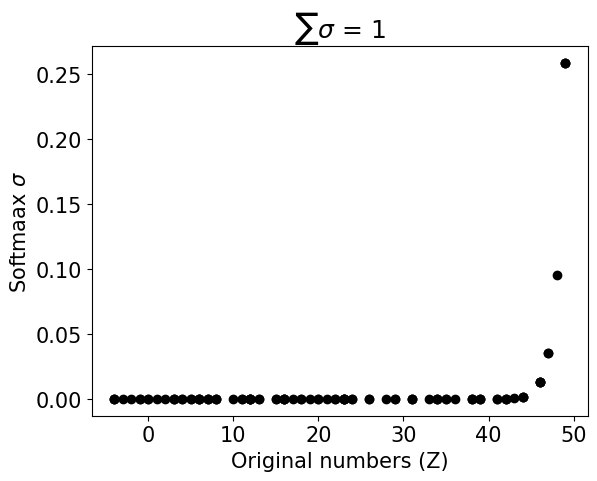

In [82]:
z = np.random.randint(-5, high=50, size=100)
print(z)
sigma = softmax(z)
# plots
plt.plot(z, sigma, "ko")
plt.xlabel("Original numbers (Z)")
plt.ylabel("Softmaax $\sigma$")
plt.title("$\sum\sigma$ = %g" % np.sum(sigma))
plt.show()

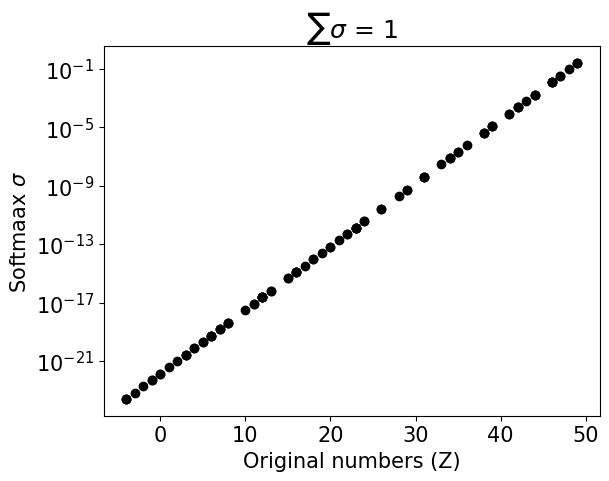

In [83]:
plt.plot(z, sigma, "ko")
plt.xlabel("Original numbers (Z)")
plt.ylabel("Softmaax $\sigma$")
plt.yscale("log")
plt.title("$\sum\sigma$ = %g" % np.sum(sigma))
plt.show()

In [84]:
# softmax using pytorch
z_torch = torch.Tensor(z)  # making torch tensors from numpy array

softmax_torch = nn.Softmax(dim=0)  # Creating softmax activation class

sigma_torch = softmax_torch(z_torch)  # Applying data to softmax_torch class

print(sigma_torch)
print("Sum of softmax always sums to 1:", torch.sum(sigma_torch))

tensor([7.4082e-21, 3.5942e-12, 2.4852e-24, 1.3569e-22, 2.1520e-07, 2.3599e-04,
        8.9091e-15, 6.4150e-04, 1.7438e-03, 1.1749e-05, 4.4356e-16, 2.7253e-21,
        5.4740e-20, 4.3224e-06, 5.8497e-07, 9.5207e-02, 4.8642e-13, 7.9167e-08,
        1.4880e-19, 2.9124e-08, 2.7253e-21, 8.1241e-18, 1.1749e-05, 7.9167e-08,
        4.0447e-19, 2.2084e-17, 4.8642e-13, 1.2885e-02, 4.3224e-06, 4.0447e-19,
        5.3343e-10, 2.7253e-21, 5.4740e-20, 2.2084e-17, 2.9887e-18, 3.6883e-22,
        6.7554e-24, 1.3222e-12, 2.5880e-01, 2.4852e-24, 1.3222e-12, 3.5025e-02,
        2.6558e-11, 6.0029e-17, 8.9091e-15, 1.4880e-19, 7.9167e-08, 2.5880e-01,
        8.6818e-05, 2.4852e-24, 4.3224e-06, 4.9916e-23, 1.2885e-02, 1.3222e-12,
        1.8363e-23, 6.5830e-14, 1.7438e-03, 4.0447e-19, 1.0026e-21, 2.3599e-04,
        2.2084e-17, 3.9415e-09, 6.0029e-17, 1.2057e-15, 5.3343e-10, 2.2084e-17,
        1.3569e-22, 2.6558e-11, 3.2775e-15, 5.4740e-20, 2.3599e-04, 1.7894e-13,
        6.5830e-14, 3.9415e-09, 2.1520e-

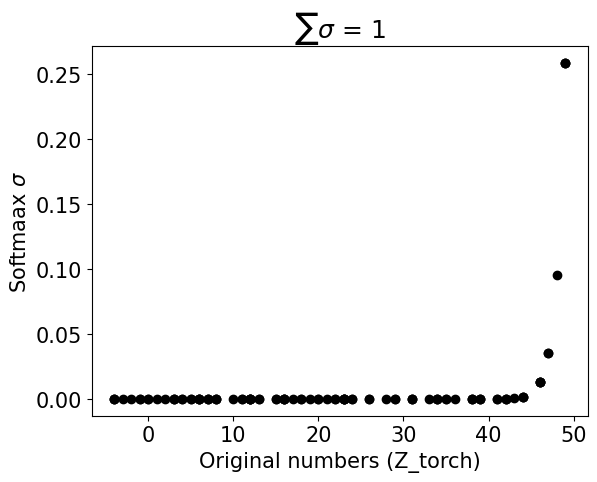

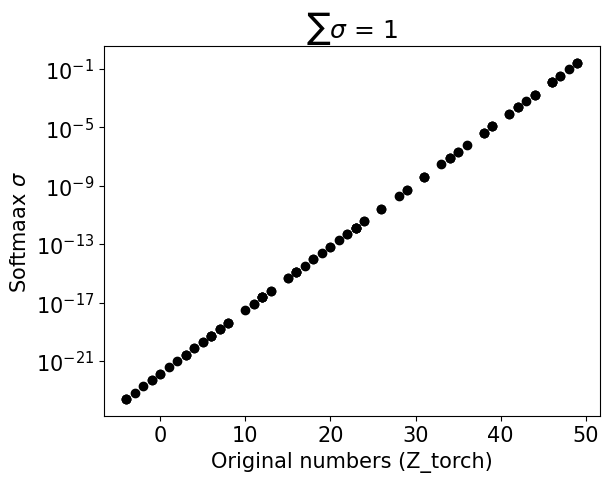

In [85]:
# plot on linear scale
plt.plot(z_torch, sigma_torch, "ko")
plt.xlabel("Original numbers (Z_torch)")
plt.ylabel("Softmaax $\sigma$")
plt.title("$\sum\sigma$ = %g" % torch.sum(sigma_torch))
plt.show()

# plot on log scale
plt.plot(z_torch, sigma_torch, "ko")
plt.xlabel("Original numbers (Z_torch)")
plt.ylabel("Softmaax $\sigma$")
plt.yscale("log")
plt.title("$\sum\sigma$ = %g" % torch.sum(sigma_torch))
plt.show()

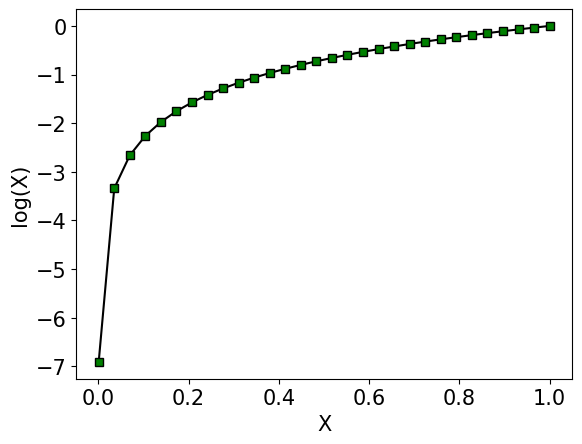

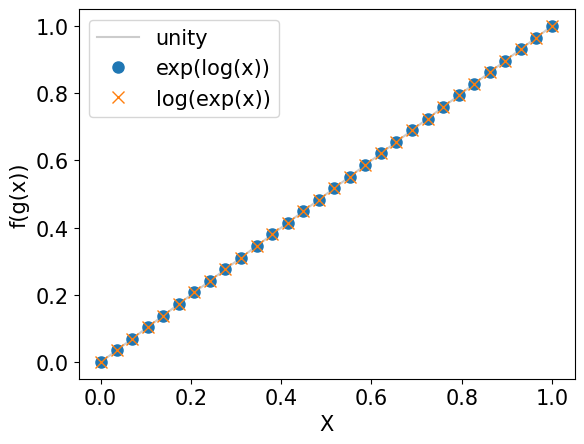

In [86]:
# Log and exp plots
x = np.linspace(0.001, 1, 30)

logx = np.log(x)
expx = np.exp(x)

# plots
plt.rcParams.update({"font.size": 15})
# plt 1
plt.plot(x, logx, "ks-", markerfacecolor="g")
plt.xlabel("X")
plt.ylabel("log(X)")
plt.show()
# plot 2 # log(exp(x)) == exp(log(x))
plt.plot(x, x, color=[0.8, 0.8, 0.8])
plt.plot(x, np.exp(logx), "o", markersize=8)
plt.plot(x, np.log(expx), "x", markersize=8)
plt.xlabel("X")
plt.ylabel("f(g(x))")
plt.legend(["unity", "exp(log(x))", "log(exp(x))"])
plt.show()

In [87]:
# Probability of event happening
p = 0.25

H = -(p * np.log(p) + (1 - p) * np.log(1 - p))

print("Entropy : ", H)

Entropy :  0.5623351446188083


In [88]:
# All Probabelities must be sum of 1
# Cross Entropy
p = [1, 0]  # sum of 1
q = [0.25, 0.75]  # sum of 1

H = 0
for i in range(len(p)):
    H -= p[i] * np.log(q[i])

print(f"Cross Entropy : {H}")

Cross Entropy : 1.3862943611198906


In [89]:
# Binary cross entropy using torch
q_tensor = torch.Tensor(q)
p_tensor = torch.Tensor(p)

binary_cross_entropy(q_tensor, p_tensor)

tensor(1.3863)

In [90]:
# Min, Max, Arg_min and Arg_max in Vectors

v = np.array([1, 40, 2, -3])
print(f"Vector v: {v}")
# Find min and max
minval = np.min(v)
maxval = np.max(v)

print(f"Min, max values: {minval, maxval}")
# Arg_min and Arg_max
minidx = np.argmin(v)
maxidx = np.argmax(v)

print(f"Min, max indices: {minidx, maxidx}")

Vector v: [ 1 40  2 -3]
Min, max values: (-3, 40)
Min, max indices: (3, 1)


In [91]:
# Min, Max, Arg_min and Arg_max in Matrix
M = np.array([[0, 1, 10], [20, 8, 5]])
print(M), print("")

# Different minima in matrix
minvals_M = np.min(M)
minvals_M_axis0 = np.min(M, axis=0)  # Minima in colums
minvals_M_axis1 = np.min(M, axis=1)  # Minima in rows

print(f"Minima in entire Matrix: {minvals_M}")
print(f"Minima in Matrix in colums: {minvals_M_axis0}")
print(f"Minima in Matrix in rows: {minvals_M_axis1}")

# Different maxima in matrix
maxvals_M = np.max(M)
maxvals_M_axis0 = np.max(M, axis=0)  # maxima in colums
maxvals_M_axis1 = np.max(M, axis=1)  # maxima in rows

print(f"Maxima in entire Matrix: {maxvals_M}")
print(f"Maxima in Matrix in colums: {maxvals_M_axis0}")
print(f"Maxima in Matrix in rows: {maxvals_M_axis1}")

# Different arg_maxima in matrix
maxidx_M = np.argmax(M)
maxidx_M_axis0 = np.argmax(M, axis=0)  # maxima in colums
maxidx_M_axis1 = np.argmax(M, axis=1)  # maxima in rows

print(f"Max_Index in entire Matrix: {maxidx_M}")
print(f"Max_Index in Matrix in colums: {maxidx_M_axis0}")
print(f"Max_Index in Matrix in rows: {maxidx_M_axis1}")

# Different arg_minima in matrix
minidx_M = np.argmin(M)
minidx_M_axis0 = np.argmin(M, axis=0)  # minima in colums
minidx_M_axis1 = np.argmin(M, axis=1)  # minima in rows

print(f"Min_Index in entire Matrix: {minidx_M}")
print(f"Min_Index in Matrix in colums: {minidx_M_axis0}")
print(f"Min_Index in Matrix in rows: {minidx_M_axis1}")

[[ 0  1 10]
 [20  8  5]]

Minima in entire Matrix: 0
Minima in Matrix in colums: [0 1 5]
Minima in Matrix in rows: [0 5]
Maxima in entire Matrix: 20
Maxima in Matrix in colums: [20  8 10]
Maxima in Matrix in rows: [10 20]
Max_Index in entire Matrix: 3
Max_Index in Matrix in colums: [1 1 0]
Max_Index in Matrix in rows: [2 0]
Min_Index in entire Matrix: 0
Min_Index in Matrix in colums: [0 0 1]
Min_Index in Matrix in rows: [0 2]


In [92]:
# min max using pytorch

v = torch.tensor([1, 40, 2, -3], dtype=torch.float)
print(f"Vector v: {v}")
# Find min and max
minval = torch.min(v)
maxval = torch.max(v)

print(f"Min, max values: {minval, maxval}")
# Arg_min and Arg_max
minidx = torch.argmin(v)
maxidx = torch.argmax(v)

print(f"Min, max indices: {minidx, maxidx}")

Vector v: tensor([ 1., 40.,  2., -3.], device='privateuseone:0')
Min, max values: (tensor(-3., device='privateuseone:0'), tensor(40., device='privateuseone:0'))
Min, max indices: (tensor(3, device='privateuseone:0'), tensor(1, device='privateuseone:0'))


In [93]:
# Min, Max, Arg_min and Arg_max in Matrix using pytorch
M = torch.tensor([[0, 1, 10], [20, 8, 5]], dtype=torch.float)
print(M), print("")

# Different minima in matrix
minvals_M = torch.min(M)
minvals_M_axis0 = torch.min(M, axis=0)  # Minima in colums
minvals_M_axis1 = torch.min(M, axis=1)  # Minima in rows

print(f"Minima in entire Matrix: {minvals_M}")
print(f"Minima in Matrix in colums: {minvals_M_axis0}")
print(f"Minima in Matrix in rows: {minvals_M_axis1}")

# min over axis returns .min function from which you can access values or indices
print(f"Minima in Matrix in colums min values: {minvals_M_axis0.values}")
print(f"Minima in Matrix in colums min indices: {minvals_M_axis0.indices}")

# Different maxima in matrix
maxvals_M = torch.max(M)
maxvals_M_axis0 = torch.max(M, axis=0)  # maxima in colums
maxvals_M_axis1 = torch.max(M, axis=1)  # maxima in rows

print(f"Maxima in entire Matrix: {maxvals_M}")
print(f"Maxima in Matrix in colums: {maxvals_M_axis0}")
print(f"Maxima in Matrix in rows: {maxvals_M_axis1}")

# Different arg_maxima in matrix
maxidx_M = torch.argmax(M)
maxidx_M_axis0 = torch.argmax(M, axis=0)  # maxima in colums
maxidx_M_axis1 = torch.argmax(M, axis=1)  # maxima in rows

print(f"Max_Index in entire Matrix: {maxidx_M}")
print(f"Max_Index in Matrix in colums: {maxidx_M_axis0}")
print(f"Max_Index in Matrix in rows: {maxidx_M_axis1}")

# Different arg_minima in matrix
minidx_M = torch.argmin(M)
minidx_M_axis0 = torch.argmin(M, axis=0)  # minima in colums
minidx_M_axis1 = torch.argmin(M, axis=1)  # minima in rows

print(f"Min_Index in entire Matrix: {minidx_M}")
print(f"Min_Index in Matrix in colums: {minidx_M_axis0}")
print(f"Min_Index in Matrix in rows: {minidx_M_axis1}")

tensor([[ 0.,  1., 10.],
        [20.,  8.,  5.]], device='privateuseone:0')

Minima in entire Matrix: 0.0
Minima in Matrix in colums: torch.return_types.min(
values=tensor([0., 1., 5.], device='privateuseone:0'),
indices=tensor([0, 0, 1], device='privateuseone:0'))
Minima in Matrix in rows: torch.return_types.min(
values=tensor([0., 5.], device='privateuseone:0'),
indices=tensor([0, 2], device='privateuseone:0'))
Minima in Matrix in colums min values: tensor([0., 1., 5.], device='privateuseone:0')
Minima in Matrix in colums min indices: tensor([0, 0, 1], device='privateuseone:0')
Maxima in entire Matrix: 20.0
Maxima in Matrix in colums: torch.return_types.max(
values=tensor([20.,  8., 10.], device='privateuseone:0'),
indices=tensor([1, 1, 0], device='privateuseone:0'))
Maxima in Matrix in rows: torch.return_types.max(
values=tensor([10., 20.], device='privateuseone:0'),
indices=tensor([2, 0], device='privateuseone:0'))
Max_Index in entire Matrix: 3
Max_Index in Matrix in colums: tenso

In [94]:
# Mean and variance

# Using numpy
x = np.array([1, 2, 4, 6, 5, 4, 0], dtype=float)
n = len(x)

# Comput mean
mean = np.mean(x)
mean_manual = np.sum(x) / n

print(f"Mean using numpy: {mean}")
print(f"Manually calculated mean: {mean_manual}")

# Compute variance
var = np.var(x, ddof=1)
var_manual = (1 / (n - 1)) * np.sum((x - mean) ** 2)
print(f"Variance using numpy: {var}")
print(f"Manually calculated varience: {var_manual}")

Mean using numpy: 3.142857142857143
Manually calculated mean: 3.142857142857143
Variance using numpy: 4.809523809523809
Manually calculated varience: 4.809523809523809


## Sampling


In [95]:
# List of numbers to compute mean and variance
x = [1, 2, 3, 4, 5, 4, 0, -4, 5, -2, 6, 10, -9, 1, 3, -6]
n = len(x)

# compute the population mean
p_mean = np.mean(x)

# compute the sample mean
sample = np.random.choice(x, size=5, replace=True)
s_mean = np.mean(sample)

# display
print(f"Population mean: {p_mean} \nSample mean : {s_mean}")

Population mean: 1.4375 
Sample mean : 3.0


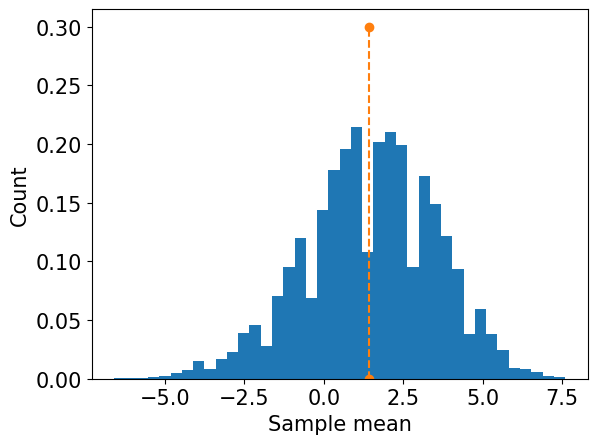

In [96]:
# Compute lots of sample means
n_experiments = 10000

s_means = np.zeros(n_experiments)

for i in range(n_experiments):

    # Draw a sample
    sample = np.random.choice(x, size=5, replace=True)

    # Compute the mean
    s_means[i] = np.mean(sample)

# Show results in a histogram
plt.hist(s_means, bins=40, density=True)
plt.plot([p_mean, p_mean], [0, 0.3], "o--")
plt.ylabel("Count")
plt.xlabel("Sample mean")
plt.show()

## Random Seed pytorch


In [97]:
print("Without random seed: ", torch.randn(5))

# Setting random seed in torch
torch.manual_seed(100)
print(
    "With random seed in pytorch: ", torch.randn(5)
)  # This line always produce the same output

# Setting the random seed does not change the random seed of numpy
print(np.random.randn(5))  # this will change on each run

Without random seed:  tensor([-2.3134, -0.3172, -0.8660,  1.7482, -0.2759], device='privateuseone:0')
With random seed in pytorch:  tensor([ 0.3607, -0.2859, -0.3938,  0.2429, -1.3833], device='privateuseone:0')
[-1.20930399  2.98435208  2.13521119 -1.80584186  0.55327231]
